# Proyek akhir: Books Recommendation System
- **Nama:** Halim Sajidi
- **Email:** halimsajidi14@gmail.com
- **ID Dicoding:** halimsajidi
- **Link Dataset:** https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data

## Persiapan

### Library

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading the dataset

In [2]:
books_df = pd.read_csv('Books.csv')
ratings_df = pd.read_csv('Ratings.csv')
users_df = pd.read_csv('Users.csv')

<ipython-input-2-c79c2408daf9>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


## Data Understanding

### Books Variabel

In [3]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
print('Banyak data: ', len(books_df['ISBN'].unique()))
print('Judul buku: ', books_df['Book-Title'].unique())
print('Penulis buku: ', books_df['Book-Author'].unique())
print('Tahun publikasi: ', books_df['Year-Of-Publication'].unique())
print('Publisher: ', books_df['Publisher'].unique())

Banyak data:  271360
Judul buku:  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
Penulis buku:  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']
Tahun publikasi:  [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2

Terdapat 82 ribu lebih data buku dan beberapa info terkait yang dapat dilihat pada hasil di atas.

#### Visualisasi

<ipython-input-140-d108562b0a26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

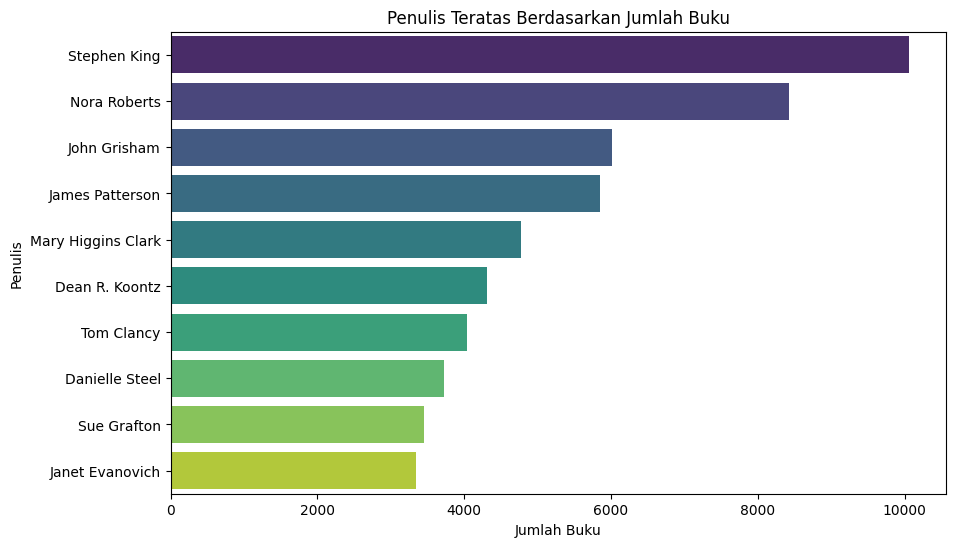

In [140]:
# Menghitung jumlah buku per penulis
author_counts = books['Book-Author'].value_counts().head(10)

# Membuat bar plot penulis teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='viridis')
plt.title('Penulis Teratas Berdasarkan Jumlah Buku')
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()

Berdasarkan gambar di atas, terdapat 10 author dengan jumlah buku terbanyak. walaupun sebenarnya masih belum bisa disimpulkan karena dari label jumlah buku nilai tertingginya di angka 10 ribu, dengan demikian simpulan awalnya adalah masih banyak data duplikat yang nantinya perlu di lakukan perbaikkan.

### Ratings Variabel

In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
print('Banyak data: ', len(ratings_df['ISBN'].unique()))
print('Rating buku: ', ratings_df['Book-Rating'].unique())

Banyak data:  340556
Rating buku:  [ 0  5  3  6  8  7 10  9  4  1  2]


Terdapat 32 ribu lebih data buku dan rating buku yang di nilai dengan rating antara 1 sampai 10

#### Visualisasi

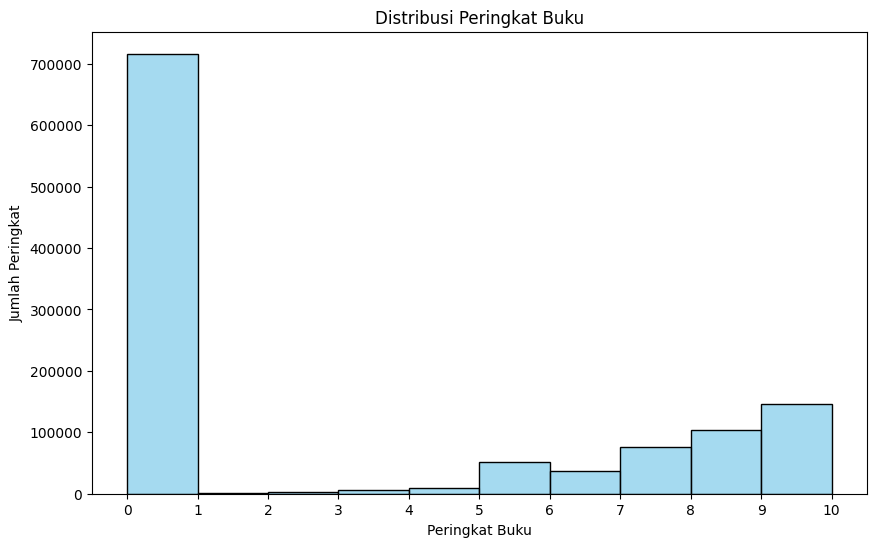

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['Book-Rating'], bins=10, kde=False, color='skyblue')
plt.title('Distribusi Peringkat Buku')
plt.xlabel('Peringkat Buku')
plt.ylabel('Jumlah Peringkat')
plt.xticks(range(11))  # Skala peringkat dari 0 hingga 10
plt.show()


Dapat dilihat berdasarkan grafik di atas, kebanyakkan user memberikan nilai rendah, banyak sekali user yang memberikan nilai 0 atau 1

### Users Variabel

In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
print('Banyak data: ', len(users_df['User-ID'].unique()))
print('Lokasi user: ', users_df['Location'].unique())
print('Banyak Lokasi: ', len(users_df['Location'].unique()))
print('umur: ', users_df['Age'].unique())

Banyak data:  278858
Lokasi user:  ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']
Banyak Lokasi:  57339
umur:  [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 

Terdapat 27 ribu lebih data buku dengan lebih dari 57 ribu lokasi

In [9]:
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Dapat dilihat kolom Age atau umur memiliki data yang tidak masuk akal, nilai minimum adalah 0 dan maksimumnya adalah 244

## Data Preprocessing

### Menggabungkan dataset books dengan ratings

In [10]:
# Menggabungkan seluruh ISBN pada kategori Restaurant
books_all = np.concatenate((
    books_df.ISBN.unique(),
    ratings_df.ISBN.unique(),
))

# Mengurutkan data dan menghapus data yang sama
books_all = np.sort(np.unique(books_all))

print('Jumlah seluruh data buku berdasarkan ISBN: ', len(books_all))

Jumlah seluruh data buku berdasarkan ISBN:  341765


In [11]:
books_all

array([' 0330299891', ' 0375404120', ' 0586045007', ..., '§423350229',
       '´3499128624', 'Ô½crosoft'], dtype=object)

### Menggabungkan dataset ratings dengan users

In [12]:
# Menggabungkan seluruh User-ID pada kategori Restaurant
users_all = np.concatenate((
    ratings_df['User-ID'].unique(),
    users_df['User-ID'].unique(),
))

# Mengurutkan data dan menghapus data yang sama
users_all = np.sort(np.unique(users_all))

print('Jumlah seluruh data buku berdasarkan User-ID: ', len(users_all))

Jumlah seluruh data buku berdasarkan User-ID:  278858


### Menggabungkan file ratings_df dan books_df

In [13]:
# Menggabungkan file ratings_df, books_df ke dalam dataframe books_info
books_info = pd.merge(ratings_df, books_df, on='ISBN', how='left')
books_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...


In [14]:
books_info.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [15]:
books = books_info[['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic


Inilah data yang akan digunakan untuk membuat sistem rekomendasi.

## Data Preparation

### Menangani Missing Value

In [16]:
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118644
Book-Author,118646
Year-Of-Publication,118644
Publisher,118646


Terdapat 418413 missing value. Langkah selanjutnya drop missing value, karena tidak bisa mengidentifikasikan nama buku yang tidak memiliki data.

In [19]:
# Membersihkan missing value dengan fungsi dropna()
books_clean = books.dropna()
books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books


Dapat dilihat dataset yang awalnya 1066941 rows × 7 columns menjadi 648528 rows × 7 columns setelah dilakukan drop nilai NaN

In [20]:
# Mengecek kembali missing value pada variabel all_resto_clean
books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [23]:
books_clean_sorted = books_clean.sort_values(by='Publisher')
books_clean_sorted

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
947346,229329,2879390311,10,"Afrique noire: Masques, sculptures, bijoux",Laure Meyer,1991,Editions P. Terrail
400332,96346,0932298737,6,Fluoridation: A modern Procrustean practice,Isabel Jansen,1990,Tri-State Press
85012,17950,9838523283,8,Trilogi Khadijah Hashim,Khadijah Hashim,1999,'K' Pub
447635,107301,0571097006,0,The big chapel,Thomas Kilroy,1971,"(3 Queen Sq., WC1N 3AU), Faber and Faber Ltd"
755617,182987,0356037290,0,Japan: the years of triumph: From feudal isola...,Louis Allen,1971,"(49 Poland St., W.1), BPC Unit 75"
...,...,...,...,...,...,...,...
424491,101234,392721731X,8,Heimat los!: Aus dem Leben eines jÃ¼dischen Em...,Gad Granach,1998,Ã?lbaum
908844,220988,3704601594,0,ReisefÃ¼hrer ins Jenseits (Edition S),Lotte Ingrisch,1990,Ã?sterreichische Staatsdruckerei
716446,173632,3215043653,0,Maria Jeritza: Primadonna des Verismo,Robert Werba,1981,Ã?sterreichischer Bundesverlag
338584,80803,2264034602,0,La Terre sous ses pieds,Salman Rushdie,2002,Ã?Â?ditions 10/18


pada kolom Book-TItle dan Book-Author terdapat penulisan yang tidak sesuai seperti Ã?Â?ditions 10/18, maka diperlukan perlakuan lebih lanjut untuk masalah ini

Di sini diputuskan untuk mengubah karakter titik (.), koma(,), dan petik (') dengan string kosong.

In [25]:
books_clean['Book-Title'] = books_clean['Book-Title'].str.replace(r"[.,']", '', regex=True)
books_clean['Publisher'] = books_clean['Publisher'].str.replace(r"[.,']", '', regex=True)

<ipython-input-25-de5d87a57d7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['Book-Title'] = books_clean['Book-Title'].str.replace(r"[.,']", '', regex=True)
<ipython-input-25-de5d87a57d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_clean['Publisher'] = books_clean['Publisher'].str.replace(r"[.,']", '', regex=True)


Digunakan regex untuk menemukan baris yang hanya mengandung huruf (a-z), angka (0-9)

In [26]:
books_clean = books_clean[books_clean['Book-Title'].str.match(r'^[a-zA-Z0-9]+$')]
books_clean = books_clean[books_clean['Publisher'].str.match(r'^[a-zA-Z0-9]+$')]

In [27]:
# Membuat variabel preparation yang berisi dataframe books_clean kemudian mengurutkan berdasarkan isbn
preparation = books_clean.copy()
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
477061,114216,0001840517,0,Bess,Robert Leeson,1975,Collins
889592,214528,0002211483,0,Dragonmede,Rona Randall,1974,Collins
714196,173018,000221329X,0,Hugh,Jonathan Wade,1974,Collins
126172,29070,0002216140,7,Offshore,Penelope Fitzgerald,1979,Collins
714199,173018,0002220032,0,Airscream,John Bruce,1977,Collins
...,...,...,...,...,...,...,...
991510,238475,B0000E63CJ,0,Dreamcatcher,Stephen King,2001,Scribner
680073,165512,B0000E63CJ,8,Dreamcatcher,Stephen King,2001,Scribner
864888,209160,B0000E63CJ,0,Dreamcatcher,Stephen King,2001,Scribner
436702,104550,B0000E63CJ,7,Dreamcatcher,Stephen King,2001,Scribner


In [28]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
32,276762,0380000059,0,CLOUT,D. GIBBONS,2024,Avon
126,276813,8495618052,0,Katiecom,Katherine Tarbox,2001,Umbriel
232,276848,3453211014,0,Kaltgestellt,Colin Forbes,2002,Heyne
325,276869,044020562X,0,One,Richard Bach,1989,Dell
422,276925,0151010633,0,Q,Luther Blissett,2004,Harcourt
...,...,...,...,...,...,...,...
1140137,274186,8466302948,1,Pandora,Anne Rice,2002,Distribooks
1140553,274301,0671832107,0,RESURRECTION,George Gipe,1980,Pocket
1141786,274308,0671744828,0,SACRIFICE,L. L. Enger,1993,Pocket
1145167,275401,2266117025,0,Flint,Paul Eddy,2002,Pocket


### Mengkonversi data series menjadi list

In [29]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
isbn = preparation['ISBN'].tolist()

# Mengonversi data series ‘Book-Title’ menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()

# Mengonversi data series ‘Publisher’ menjadi dalam bentuk list
book_Publisher = preparation['Publisher'].tolist()

print(len(isbn))
print(len(book_title))
print(len(book_Publisher))

2793
2793
2793


In [30]:
# Membuat dictionary untuk data isbn, book_title, dan book_author
book_new = pd.DataFrame({
    'id': isbn,
    'book_name': book_title,
    'publisher': book_Publisher
})
book_new

,id,book_name,publisher
0,0380000059,CLOUT,Avon
1,8495618052,Katiecom,Umbriel
2,3453211014,Kaltgestellt,Heyne
3,044020562X,One,Dell
4,0151010633,Q,Harcourt
...,...,...,...
2788,8466302948,Pandora,Distribooks
2789,0671832107,RESURRECTION,Pocket
2790,0671744828,SACRIFICE,Pocket
2791,2266117025,Flint,Pocket


## Modeling and Result

### Content Based Filtering

#### TF-IDF Vectorizer

pada tahap ini dilakukan teknik TF-IDF yang akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori product di amazon.

In [42]:
data = book_new.copy()
data

,id,book_name,publisher
0,0380000059,CLOUT,Avon
1,8495618052,Katiecom,Umbriel
2,3453211014,Kaltgestellt,Heyne
3,044020562X,One,Dell
4,0151010633,Q,Harcourt
...,...,...,...
2788,8466302948,Pandora,Distribooks
2789,0671832107,RESURRECTION,Pocket
2790,0671744828,SACRIFICE,Pocket
2791,2266117025,Flint,Pocket


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data publisher
tf.fit(data['publisher'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['abacus', 'ace', 'agata', 'aguilar', 'aladdin', 'alba', 'alianza',
       'altaya', 'amistad', 'ammann', 'amphoto', 'anagrama', 'anansi',
       'anchor', 'aperture', 'arabesque', 'arrow', 'aspect', 'assouline',
       'astran', 'atheneum', 'atlantida', 'atlas', 'atria', 'audioworks',
       'authorhouse', 'autrement', 'avon', 'backinprintcom', 'badboy',
       'baen', 'baleine', 'bantam', 'beascoa', 'beltz', 'beltzpvu',
       'berkley', 'bison', 'blanvalet', 'bloomsbury', 'bonnier',
       'bookcraft', 'booket', 'booklockercom', 'bookpeople', 'brava',
       'broadway', 'btb', 'bucher', 'budget', 'bulfinch', 'caedmon',
       'cape', 'cappelen', 'carlsen', 'century', 'chapmans', 'chbeck',
       'cheers', 'cheyne', 'codex', 'collins', 'columna', 'consortium',
       'corgi', 'crescent', 'crimeline', 'critica', 'crowell', 'crown',
       'dafina', 'debate', 'dell', 'delta', 'deuticke', 'diogenes',
       'distal', 'distribooks', 'domain', 'doubleday', 'dtv', 'dutton',
       'd

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [33]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['publisher'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(2793, 306)

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [34]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa produk (Product_Name) dan kategori produk (Product_Category). Terapkan kode berikut.

In [35]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_name
).sample(22, axis=1).sample(10, axis=0)

,distribooks,hamilton,scholastic,yearling,harperentertainment,island,fontana,kindler,spectra,mira,...,crowell,backinprintcom,garzanti,frauenoffensive,publicaffairs,abacus,planeta,deuticke,scribner,mckay
book_name,,,,,,,,,,,,,,,,,,,,,
Bitch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pig,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casanova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kensington,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fairyland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crustaceans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dangerous,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SACRIFICE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nachtblau,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [37]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_name'], columns=data['book_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2793, 2793)


book_name,Shattered,Fortitude,STYGO,BCBG,Arabesk
book_name,,,,,
Shanna,0.0,0.0,0.0,0.0,0.0
ROGUE,0.0,1.0,0.0,0.0,0.0
Whistlejacket,0.0,0.0,0.0,0.0,0.0
Warrior,1.0,0.0,0.0,0.0,0.0
DREAMSNAKE,0.0,0.0,0.0,0.0,0.0
Imagine,0.0,1.0,0.0,0.0,0.0
Loyalties,0.0,0.0,0.0,0.0,0.0
Joni,0.0,0.0,0.0,0.0,0.0
Feuerzauber,0.0,0.0,0.0,0.0,0.0


#### Mendapatkan Rekomendasi

In [39]:
def resto_recommendations(book_name, similarity_data=cosine_sim_df, items=data[['book_name', 'publisher']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    book_name : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_name agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [44]:
data[data.book_name.eq('AFTERMATH')]

,id,book_name,publisher
1276,0671883895,AFTERMATH,Fireside


Tabel di atas adalah user yang menyukai buku berjudul aftermath yang berasal dari publisher fireside.

In [43]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
resto_recommendations('AFTERMATH')

,book_name,publisher
0,LIFEPOINTS,Fireside
1,PENTAMAGIC,Fireside
2,SIGHTINGS,Fireside
3,PUZZLEGRAMS,Fireside
4,Misery,Lgf


Berdasarkan hasil rekomendasi di atas, judul buku aftermah merupakan buku yang diterbitkan oleh publisher Fireside. Kemudian dari 5 rekomendasi yang diberikan, 4 dari 5 memiliki kesesuaian publisher

### Collaborative Filtering

In [45]:
books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
32,276762,0380000059,0,CLOUT,D. GIBBONS,2024,Avon
126,276813,8495618052,0,Katiecom,Katherine Tarbox,2001,Umbriel
232,276848,3453211014,0,Kaltgestellt,Colin Forbes,2002,Heyne
325,276869,044020562X,0,One,Richard Bach,1989,Dell
422,276925,0151010633,0,Q,Luther Blissett,2004,Harcourt
...,...,...,...,...,...,...,...
1148969,276538,3442422337,5,Mondlaub,Tanja Kinkel,1997,Goldmann
1149203,276626,0786882212,7,Trainspotting,John Hodge,1996,Miramax
1149578,276680,0679739793,0,Waterland,GRAHAM SWIFT,1992,Vintage
1149765,276704,0440206529,0,Blessings,Belva Plain,1990,Dell


#### Data Preparation

Pada tahap ini, dilakukan persiapan data untuk menyandikan (encode) fitur ‘User-ID’ dan ‘ISBN’ ke dalam indeks integer.

In [47]:
# Mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = books_clean['User-ID'].unique().tolist()
print('list User-ID: ', user_ids)

# Melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User-ID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User-ID: ', user_encoded_to_user)

list User-ID:  [276762, 276813, 276848, 276869, 276925, 276929, 276936, 276939, 276988, 277042, 277051, 277107, 277187, 277195, 277203, 277253, 277363, 277379, 277427, 277478, 277509, 277569, 277639, 277701, 277710, 277711, 277720, 277783, 277801, 277827, 277828, 277884, 277892, 277922, 277929, 277965, 278026, 278137, 278177, 278188, 278221, 278251, 278255, 278314, 278356, 278390, 278418, 278465, 278582, 278633, 278637, 278771, 278781, 278819, 278851, 39, 185, 243, 254, 300, 446, 503, 507, 508, 625, 643, 651, 685, 728, 735, 850, 882, 885, 900, 913, 915, 1060, 1083, 1123, 1129, 1131, 1155, 1167, 1169, 1225, 1254, 1409, 1424, 1435, 1467, 1485, 1583, 1596, 1652, 1660, 1688, 1733, 1848, 1903, 2010, 2030, 2033, 2043, 2090, 2110, 2244, 2276, 2335, 2354, 2385, 2406, 2589, 2760, 2766, 2790, 2793, 2799, 2891, 2892, 2906, 2977, 3017, 3079, 3145, 3167, 3321, 3363, 3371, 3373, 3374, 3427, 3537, 3583, 3596, 3643, 3648, 3675, 3713, 3719, 3728, 3768, 3827, 3915, 3923, 3977, 4017, 4092, 4144, 4157, 42

In [49]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = books_clean['ISBN'].unique().tolist()

# Melakukan proses encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}

# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}

In [50]:
# Mapping userID ke dataframe user
books_clean['user'] = books_clean['User-ID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe isbn
books_clean['isbn'] = books_clean['ISBN'].map(isbn_to_isbn_encoded)

In [56]:
books_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18042 entries, 32 to 1149771
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              18042 non-null  int64 
 1   ISBN                 18042 non-null  object
 2   Book-Rating          18042 non-null  int64 
 3   Book-Title           18042 non-null  object
 4   Book-Author          18042 non-null  object
 5   Year-Of-Publication  18042 non-null  object
 6   Publisher            18042 non-null  object
 7   user                 18042 non-null  int64 
 8   isbn                 18042 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [71]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah isbn
num_isbn = len(isbn_encoded_to_isbn)
print(num_isbn)

# Mengubah Book-Rating menjadi nilai float
books_clean['Book-Rating'] = books_clean['Book-Rating'].values.astype(np.float32)

# Nilai minimum Book-Rating
min_Book_Rating = min(books_clean['Book-Rating'])

# Nilai maksimal Book-Rating
max_Book_Rating = max(books_clean['Book-Rating'])

print('Number of User: {}, Number of isbn: {}, Min Book-Rating: {}, Max Book-Rating: {}'.format(
    num_users, num_isbn, min_Book_Rating, max_Book_Rating
))

7611
2793
Number of User: 7611, Number of isbn: 2793, Min Book-Rating: 0.0, Max Book-Rating: 10.0


#### Membagi data untuk training dan validasi

In [72]:
books_clean.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,user,isbn
143309,32122,0671001787,0.0,Alaska,Frank Lauria,1996,Aladdin,865,297
551659,132375,1551664348,7.0,Montana,Debbie Macomber,1998,Mira,3623,149
847413,204864,0671024809,7.0,Wither,J G Passarella,1999,Atria,5575,1102
496885,119602,0671004107,10.0,Contact,Carl Sagan,1997,Pocket,3284,169
347451,82926,0440201926,0.0,Kaleidoscope,Danielle Steel,1988,Dell,2284,407


In [73]:
# Mengacak dataset
books_clean = books_clean.sample(frac=1, random_state=42)
books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,user,isbn
789770,190925,0373482590,0.0,Aftershocks,Catherine Coulter,1993,Silhouette,5221,867
509996,123981,0440203856,0.0,Zoya,Danielle Steel,1989,Dell,3387,369
248620,56856,044020562X,0.0,One,Richard Bach,1989,Dell,1549,3
662494,160735,044011585X,0.0,Crossings,DANIELLE STEEL,1987,Dell,4393,24
895583,216647,3453115937,0.0,Enigma,Robert Harris,1996,Heyne,5920,520
...,...,...,...,...,...,...,...,...,...
151074,34227,0553569783,9.0,Heartstone,PHILLIP M. MARGOLIN,1995,Bantam,920,462
887067,213523,0671019414,8.0,Hooked,Stef Ann Holm,1999,Pocket,5840,1431
313114,75499,0671819496,6.0,ILLUMINOIDS,Wilgus,1979,Pocket,2065,1496
212707,49422,0671004107,9.0,Contact,Carl Sagan,1997,Pocket,1346,169


In [74]:
# Membuat variabel x untuk mencocokkan data user dan isbn menjadi satu value
x = books_clean[['user', 'isbn']].values

# Membuat variabel y untuk membuat rating dari hasil
y = books_clean['Book-Rating'].apply(lambda x: (x - min_Book_Rating) / (max_Book_Rating - min_Book_Rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * books_clean.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[5221  867]
 [3387  369]
 [1549    3]
 ...
 [2065 1496]
 [1346  169]
 [2717  189]] [0.  0.  0.  ... 0.6 0.9 0. ]


#### Proses training

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [78]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_isbn, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_isbn = num_isbn
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_isbn,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_isbn, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [84]:
model = RecommenderNet(num_users, num_isbn, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [128]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.4784 - root_mean_squared_error: 0.3178 - val_loss: 0.5588 - val_root_mean_squared_error: 0.3617
Epoch 2/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.4613 - root_mean_squared_error: 0.3102 - val_loss: 0.5582 - val_root_mean_squared_error: 0.3619
Epoch 3/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.4613 - root_mean_squared_error: 0.3061 - val_loss: 0.5554 - val_root_mean_squared_error: 0.3609
Epoch 4/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.4454 - root_mean_squared_error: 0.2976 - val_loss: 0.5523 - val_root_mean_squared_error: 0.3595
Epoch 5/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.4353 - root_mean_squared_error: 0.2919 - val_loss: 0.5511 - val_root_mean_squared_error: 0.3593
Epoch 6/20
1805/1805 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.4286 - root_mean_squared_error: 0.2879 - val_loss: 0.5485 - val_root_mean_squared_error: 0.3583
Epoch 7/20
1805/1805 ━━━━━━━━━━━━━

### Evaluation

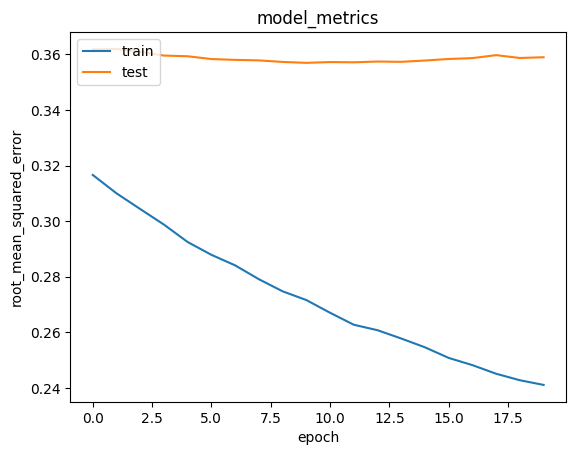

In [129]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
book_clean = books_clean.copy()

In [131]:
# Membuang data duplikat pada variabel book_clean
book_clean = book_clean.drop_duplicates('ISBN')
book_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,user,isbn
789770,190925,0373482590,0.0,Aftershocks,Catherine Coulter,1993,Silhouette,5221,867
509996,123981,0440203856,0.0,Zoya,Danielle Steel,1989,Dell,3387,369
248620,56856,044020562X,0.0,One,Richard Bach,1989,Dell,1549,3
662494,160735,044011585X,0.0,Crossings,DANIELLE STEEL,1987,Dell,4393,24
895583,216647,3453115937,0.0,Enigma,Robert Harris,1996,Heyne,5920,520
...,...,...,...,...,...,...,...,...,...
600965,145165,0747202427,0.0,Partners,Bransford,1990,Headline,4003,2132
1028490,245963,0749300582,0.0,Anachronisms,Christopher Hinz,1989,Mandarin,6745,2672
1019084,244349,0373251394,0.0,Wintersfield,Jenna Lee Joyce,1984,Harlequin,6691,2657
1063575,254226,0743527577,9.0,Remembrance,Jude Deveraux,2002,Encore,7004,2704


In [132]:
book_df = book_clean[['ISBN','Book-Title','Publisher']]
df = book_clean[['User-ID','ISBN','Book-Rating']]

In [133]:
book_df = book_df.rename(columns={
    'Book-Title': 'Title',
    'Book-Rating': 'Rating',
    'Publisher': 'Publisher'
})

df = df.rename(columns={
    'Book-Rating': 'Rating'
})

In [134]:
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
resto_visited_by_user = df[df['User-ID'] == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
resto_not_visited = book_df[~book_df['ISBN'].isin(resto_visited_by_user.ISBN.values)]['ISBN']
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [135]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('books with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

# Loop through top books visited by the user and print the title and publisher
book_df_rows = book_df[book_df['ISBN'].isin(top_resto_user)]
for row in book_df_rows.itertuples():
    print(row.Title, ':', row.Publisher)

print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)

# Loop through top recommended books and print the title and publisher
recommended_resto = book_df[book_df['ISBN'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.Title, ':', row.Publisher)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Showing recommendations for users: 23902
books with high ratings from user
--------------------------------
Caracole : Vintage
Greenmantle : IndyPublishcom
Cuckoo : Headline
--------------------------------
Top 10 books recommendation
--------------------------------
Carrie : Pocket
Frindle : Aladdin
Bloomability : HarperTrophy
Niebla : Alianza
Solaris : Minotauro
Weaveworld : Pocket
Illusions : Arrow
Garbo : Pan
Shadowplay : LoonBooks
Voyager : Delta


hasil di atas adalah rekomendasi untuk user dengan id 105979. Dari output tersebut, kita dapat membandingkan antara books with high ratings from user dan Top 10 books recommendation untuk user.